In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from data_helper import DataHelper
from grid_search import MyGridSearch
from models.monthly_average import MonthlyAverageClassifier
import pandas as pd

In [2]:
dh = DataHelper()
columns = ['pool','day_of_week']
days = dh.generate_feature_vectors_for_cnn(columns)
print(days.shape)



KeyboardInterrupt: 

In [ ]:
days = dh.generate_feature_vectors_for_cnn(columns)
print(days.shape)

In [15]:
dh = DataHelper()
days = dh.get_all_days_list()

data = []
for day in days:
    data.append(day.get_normalized_data())

df = pd.concat(data)
df.describe()

,pool,lines_reserved,day_of_week,month,day,hour,minute,holiday,reserved_Lavoda,reserved_Club Junior,...,reserved_Sidorovich,reserved_OS DUFA,temperature_binned,wind_binned,humidity_binned,precipitation_binned,pressure_binned,reserved_other,minute_of_day,year
count,129440.000000,129440.000000,129440.000000,129440.000000,129440.000000,129440.000000,129440.000000,129440.000000,129440.000000,129440.000000,...,129440.000000,129440.000000,129440.000000,129440.000000,129440.000000,129440.000000,129440.000000,129440.000000,129440.000000,129440.000000
mean,0.262665,0.147721,0.480038,0.530958,0.508624,0.543929,0.456761,0.006528,0.005098,0.003546,...,0.000324,0.000985,0.545744,0.278331,0.696574,0.058516,0.481248,0.003710,0.562960,0.329652
std,0.187076,0.163748,0.326740,0.290442,0.285696,0.209330,0.288782,0.080533,0.024724,0.020753,...,0.006360,0.014855,0.255139,0.204270,0.228110,0.166110,0.226437,0.029296,0.209493,0.064491
min,0.000000,0.000000,0.000000,0.083333,0.032258,0.166667,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.200000
25%,0.125000,0.000000,0.166667,0.250000,0.258065,0.375000,0.166667,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.285714,0.200000,0.500000,0.000000,0.250000,0.000000,0.392361,0.300000
50%,0.220000,0.125000,0.500000,0.500000,0.516129,0.541667,0.416667,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.571429,0.200000,0.750000,0.000000,0.500000,0.000000,0.565972,0.300000
75%,0.407500,0.250000,0.666667,0.833333,0.741935,0.708333,0.666667,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.714286,0.400000,0.750000,0.000000,0.500000,0.000000,0.743056,0.400000
max,0.945000,1.000000,1.000000,1.000000,1.000000,0.916667,0.983333,1.000000,0.125000,0.125000,...,0.125000,0.250000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.916667,0.400000


In [3]:
columns = ['pool','day_of_week','month','minute_of_day', 'year', 'reserved_Vodnik','lines_reserved']
# Add weather
parameteres = {	'n_estimators': [20] ,
                'max_depth': [20, 50] ,
                'min_samples_split': [2, 5],
                'min_samples_leaf': [1, 2]}

mgs = MyGridSearch('ExtraTreesClassifier',parameteres)
mgs.fit(columns)

ValueError: Unknown label type: 'continuous'

In [ ]:
parameteres = {	'n_estimators': [20, 50, 100],
                'learning_rate': [0.01,0.1,0.5]}

mgs = MyGridSearch('AdaBoostClassifier',parameteres)
mgs.fit(columns)

In [ ]:
parameteres = {	'C': [0.001, 0.01, 0.1, 1, 10],
                'gamma': [0.001, 0.01, 0.1, 1]}
parameteres = {	'C': [0.001, 0.01, 0.1, 1, 10]}
mgs = MyGridSearch('SVC',parameteres)
mgs.fit(['pool','day_of_week','month','hour','minute'] )

In [ ]:
from hmmlearn.hmm import MultinomialHMM, GaussianHMM
import numpy as np

In [ ]:
dh = DataHelper()
columns = ['pool','lines_reserved','day_of_week']
x_train, y_train, x_test, y_test = dh.generate_feature_vectors(columns, 1)
print(x_train)

In [ ]:
x, x_len = dh.generate_feature_vectors_for_hmm(columns)
g = GaussianHMM(n_components=400)

In [ ]:
g.fit(x, x_len)

In [ ]:
import pickle
with open("gmm.pkl", "wb") as file: pickle.dump(g, file)

In [3]:
dh = DataHelper()
dh.get_all_columns_names()

Index(['pool', 'lines_reserved', 'time', 'day_of_week', 'month', 'day', 'hour',
       'minute', 'holiday', 'reserved_Lavoda', 'reserved_Club Junior',
       'reserved_Elab', 'reserved_Vodnik', 'reserved_Spirala',
       'reserved_Amalka', 'reserved_Dukla', 'reserved_Lodicka',
       'reserved_Elab team', 'reserved_Sports Team', 'reserved_Modra Hvezda',
       'reserved_VSC MSMT', 'reserved_Orka', 'reserved_Activity',
       'reserved_Aquamen', 'reserved_Zralok', 'reserved_SK Impuls',
       'reserved_Motylek', 'reserved_3fit', 'reserved_Jitka Vachtova',
       'reserved_Hodbod', 'reserved_DUFA', 'reserved_The Swim',
       'reserved_Neptun', 'reserved_Strahov Cup', 'reserved_Apneaman',
       'reserved_Michovsky', 'reserved_Betri', 'reserved_Pospisil',
       'reserved_Vachtova', 'reserved_Riverside', 'reserved_Vodni polo Sparta',
       'reserved_Road 2 Kona', 'reserved_Water Polo Sparta Praha',
       'reserved_Sucha', 'reserved_Totkovicova', 'reserved_DDM Spirala',
       'reserved

In [6]:
parameteres = {	'n_estimators': [5, 10]}
columns = ['pool','day_of_week','month','minute_of_day', 'year', 'reserved_Vodnik','lines_reserved']
mgs = MyGridSearch('RandomForestClassifier',parameteres)
mgs.fit(columns)

1 out of 2 done for parameters RandomForestClassifier(random_state=17, n_estimators=5) with score 8522.1, best MSE so far = 8522.1
2 out of 2 done for parameters RandomForestClassifier(random_state=17, n_estimators=10) with score 2582.9, best MSE so far = 2582.9
GridSearch for RandomForestClassifier done.
Best MSE = 2582.9 for parameters:
{'n_estimators': 10}
Saving best estimator


In [23]:
parameteres = {	'n_estimators': [10],
                'max_depth': [35],
                'min_samples_split':[10],
                'min_samples_leaf':[1],
                'max_features':[7],
                'max_leaf_nodes':[None]}
columns = ['pool','day_of_week','month','minute_of_day', 'year', 'reserved_Vodnik','lines_reserved']
mgs = MyGridSearch('RandomForestRegressor',parameteres)
mgs.fit(columns)

1 out of 6 done for parameters RandomForestRegressor(random_state=17, n_estimators=10, max_depth=35, min_samples_split=10, min_samples_leaf=1, max_features=7, max_leaf_nodes=1000) with score 1464.8, best MSE so far = 1464.8
2 out of 6 done for parameters RandomForestRegressor(random_state=17, n_estimators=10, max_depth=35, min_samples_split=10, min_samples_leaf=1, max_features=7, max_leaf_nodes=3000) with score 1221.2, best MSE so far = 1221.2
3 out of 6 done for parameters RandomForestRegressor(random_state=17, n_estimators=10, max_depth=35, min_samples_split=10, min_samples_leaf=1, max_features=7, max_leaf_nodes=5000) with score 1167.3, best MSE so far = 1167.3
4 out of 6 done for parameters RandomForestRegressor(random_state=17, n_estimators=10, max_depth=35, min_samples_split=10, min_samples_leaf=1, max_features=7, max_leaf_nodes=10000) with score 1077.1, best MSE so far = 1077.1
5 out of 6 done for parameters RandomForestRegressor(random_state=17, n_estimators=10, max_depth=35, mi

In [17]:
time_step_back = 10
parameteres = {	'n_estimators': [50],
                'max_depth': [35],
                'min_samples_split':[2],
                'min_samples_leaf':[1],
                'max_features':[40],
                'max_leaf_nodes':[None]}
columns = ['pool','day_of_week','month','minute_of_day', 'year', 'reserved_Vodnik','lines_reserved']
columns = list(dh.get_all_columns_names())
columns.remove('time')
mgs = MyGridSearch('ExtraTreesRegressor',parameteres)
mgs.fit(columns, time_step_back)

1 out of 3 done for parameters ExtraTreesRegressor(random_state=17, n_estimators=30, max_depth=35, min_samples_split=2, min_samples_leaf=1, max_features=40, max_leaf_nodes=None) with score 701.1, best MSE so far = 701.1
2 out of 3 done for parameters ExtraTreesRegressor(random_state=17, n_estimators=50, max_depth=35, min_samples_split=2, min_samples_leaf=1, max_features=40, max_leaf_nodes=None) with score 680.5, best MSE so far = 680.5
3 out of 3 done for parameters ExtraTreesRegressor(random_state=17, n_estimators=100, max_depth=35, min_samples_split=2, min_samples_leaf=1, max_features=40, max_leaf_nodes=None) with score 678.7, best MSE so far = 678.7
GridSearch for ExtraTreesRegressor done.
Best MSE = 678.7 for parameters:
{'n_estimators': 100, 'max_depth': 35, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 40, 'max_leaf_nodes': None}
Saving best estimator


In [8]:
dh = DataHelper()
time_step_back = 5
x_train, y_train, x_test, y_test = dh.generate_feature_vectors(columns, time_step_back)
# x_train, y_train, x_test, y_test = self.dh.generate_normalized_feature_vectors(columns_to_keep, time_step_back)
e = RandomForestRegressor(random_state=17, n_estimators=5)
e.fit(x_train, y_train.ravel())

score = dh.mse_on_testing_days(e, columns, time_step_back)
print('MSE = %.1f' % (score))

MSE = 1135.8


In [3]:
dh = DataHelper()
columns = ['pool','day_of_week','month','minute_of_day', 'year', 'reserved_Vodnik','lines_reserved']

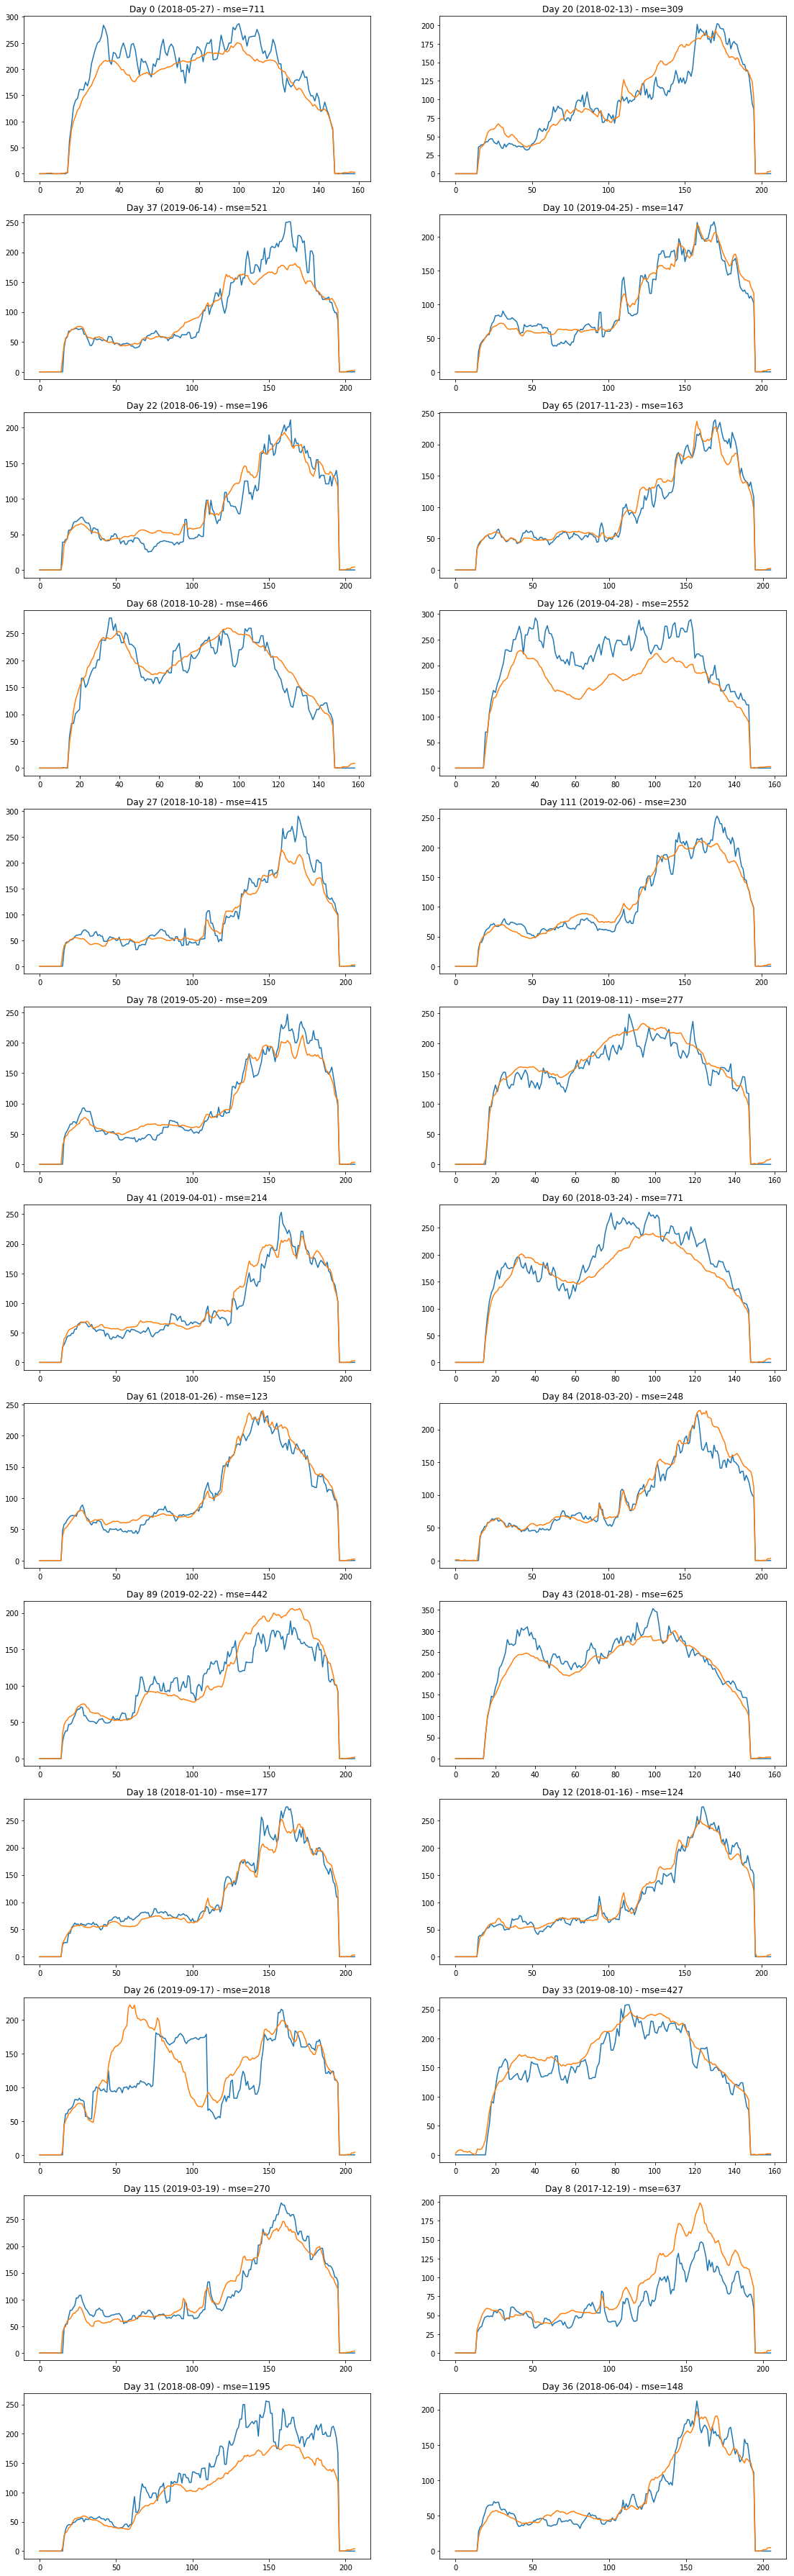

In [18]:
dh.show_n_days_prediction(mgs.best_estimator, columns, days=26, time_steps_back=time_step_back)

In [18]:
mac = MonthlyAverageClassifier()
columns = list(dh.get_all_columns_names())
columns.remove('time')
mac.fit(dh.get_training_days(), columns)
score = dh.mse_on_testing_days(mac, columns)
print('MSE = %.1f' % (score))

MSE = 978.6


In [14]:
dh.get_all_columns_names()

Index(['pool', 'lines_reserved', 'time', 'day_of_week', 'month', 'day', 'hour',
       'minute', 'holiday', 'reserved_Lavoda', 'reserved_Club Junior',
       'reserved_Elab', 'reserved_Vodnik', 'reserved_Spirala',
       'reserved_Amalka', 'reserved_Dukla', 'reserved_Lodicka',
       'reserved_Elab team', 'reserved_Sports Team', 'reserved_Modra Hvezda',
       'reserved_VSC MSMT', 'reserved_Orka', 'reserved_Activity',
       'reserved_Aquamen', 'reserved_Zralok', 'reserved_SK Impuls',
       'reserved_Motylek', 'reserved_3fit', 'reserved_Jitka Vachtova',
       'reserved_Hodbod', 'reserved_DUFA', 'reserved_The Swim',
       'reserved_Neptun', 'reserved_Strahov Cup', 'reserved_Apneaman',
       'reserved_Michovsky', 'reserved_Betri', 'reserved_Pospisil',
       'reserved_Vachtova', 'reserved_Riverside', 'reserved_Vodni polo Sparta',
       'reserved_Road 2 Kona', 'reserved_Water Polo Sparta Praha',
       'reserved_Sucha', 'reserved_Totkovicova', 'reserved_DDM Spirala',
       'reserved